# ASSIGNMENT 2
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

## Metode Statistik
- Preprocessing data
- Measure of Central Tendency
- Measure of Spread
- Probability Distribution
- Confidence Intervals
- Hypotesis Testing


In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})

import math
from scipy.stats import uniform, norm, gamma, poisson, binom, bernoulli, expon, pearsonr

import statsmodels.api as sm

import random
import warnings

plt.style.use('ggplot')

df=pd.read_csv('assignment2.csv')
print(df)

       Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
1               5        1  ALPHABET CITY   
2               6        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
...      

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [3]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


untuk menampilkan nilai kolom:

In [5]:
df1=df.head(10)
df1.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

Untuk memeriksa apakah ada kolom yang memiliki nilai nol:

In [6]:
print(df.isnull().any())

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool


In [7]:
print(df.shape)

(84548, 22)


In [8]:
df.min()

Unnamed: 0                                                                  4
BOROUGH                                                                     1
NEIGHBORHOOD                                               AIRPORT LA GUARDIA
BUILDING CLASS CATEGORY           01 ONE FAMILY DWELLINGS                    
TAX CLASS AT PRESENT                                                         
BLOCK                                                                       1
LOT                                                                         1
EASE-MENT                                                                    
BUILDING CLASS AT PRESENT                                                    
ADDRESS                                                  ****** 95TH   STREET
APARTMENT NUMBER                                                             
ZIP CODE                                                                    0
RESIDENTIAL UNITS                                               

In [9]:
df.max()

Unnamed: 0                                                              26739
BOROUGH                                                                     5
NEIGHBORHOOD                                                  WYCKOFF HEIGHTS
BUILDING CLASS CATEGORY           49 CONDO WAREHOUSES/FACTORY/INDUS          
TAX CLASS AT PRESENT                                                        4
BLOCK                                                                   16322
LOT                                                                      9106
EASE-MENT                                                                    
BUILDING CLASS AT PRESENT                                                  Z9
ADDRESS                                                         ZEREGA AVENUE
APARTMENT NUMBER                                                            `
ZIP CODE                                                                11694
RESIDENTIAL UNITS                                               

In [10]:
print(df.groupby)

<bound method DataFrame.groupby of        Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
1               5        1  ALPHABET CITY   
2               6        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS            

### Preprocessing Data



CleanUp Data

In [11]:
clean_df = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1) #

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

In [12]:
sum(clean_df.duplicated())

2751

In [13]:
clean_df = clean_df.drop_duplicates()
sum(clean_df.duplicated())

0

In [14]:
clean_df.replace(' -  ', 0,  inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [15]:
clean_df.replace(np.nan,0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [16]:
SP = clean_df['SALE PRICE'].astype('int64')
SP.info()

<class 'pandas.core.series.Series'>
Int64Index: 81797 entries, 0 to 84547
Series name: SALE PRICE
Non-Null Count  Dtype
--------------  -----
81797 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [17]:
chelsea_ = clean_df[clean_df['NEIGHBORHOOD'] == 'CHELSEA']
chelsea_

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
204,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,766,A9,1,0,1,1360,2736,1910,1,A9,0,2017-01-06 00:00:00
205,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,766,A9,1,0,1,1360,2736,1910,1,A9,0,2016-10-20 00:00:00
206,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,A9,1,0,1,1975,3855,1901,1,A9,7425000,2016-12-30 00:00:00
207,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,A4,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00
210,1,CHELSEA,02 TWO FAMILY DWELLINGS,1,743,B3,2,0,2,1526,3168,1910,1,B3,0,2017-02-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1,CHELSEA,47 CONDO NON-BUSINESS STORAGE,,794,,0,0,0,0,0,0,4,RS,0,2016-10-13 00:00:00
1003,1,CHELSEA,47 CONDO NON-BUSINESS STORAGE,,794,,0,0,0,0,0,0,4,RS,0,2016-10-20 00:00:00
1004,1,CHELSEA,47 CONDO NON-BUSINESS STORAGE,,794,,0,0,0,0,0,0,4,RS,0,2016-11-14 00:00:00
1005,1,CHELSEA,47 CONDO NON-BUSINESS STORAGE,,794,,0,0,0,0,0,0,4,RS,0,2016-12-14 00:00:00


In [18]:
chelsea_[['NEIGHBORHOOD', 'YEAR BUILT', 'LAND SQUARE FEET','SALE PRICE', 'BLOCK']].head()

,NEIGHBORHOOD,YEAR BUILT,LAND SQUARE FEET,SALE PRICE,BLOCK
204,CHELSEA,1910,1360,0,766
205,CHELSEA,1910,1360,0,766
206,CHELSEA,1901,1975,7425000,771
207,CHELSEA,1900,1588,10,772
210,CHELSEA,1910,1526,0,743


In [19]:
blok= chelsea_['BLOCK']
blok

204     766
205     766
206     771
207     772
210     743
       ... 
1002    794
1003    794
1004    794
1005    794
1006    799
Name: BLOCK, Length: 779, dtype: int64

In [20]:
blok = np.array(chelsea_['BLOCK'])
print(blok)

[766 766 771 772 743 766 769 717 719 791 696 719 722 743 745 764 765 765
 765 765 770 770 770 772 790 790 790 790 695 700 700 700 794 717 717 719
 719 719 720 720 720 720 720 720 720 720 722 722 722 722 722 740 740 740
 740 740 740 741 741 741 742 742 743 743 743 744 744 744 744 744 744 744
 744 745 745 745 745 745 745 745 745 745 745 745 745 745 745 746 746 746
 765 765 765 765 766 766 766 766 766 770 770 770 771 771 771 771 771 772
 772 772 772 791 791 791 791 791 800 694 694 694 694 694 694 694 694 694
 694 717 720 720 720 720 720 722 722 738 738 740 742 742 744 744 744 744
 747 747 748 748 748 748 748 748 748 748 748 749 749 749 749 751 751 751
 751 751 751 751 751 752 764 764 765 765 765 766 766 766 766 770 770 770
 770 770 770 770 770 770 771 771 771 771 771 771 771 771 771 771 771 771
 772 773 773 773 773 773 773 773 773 773 773 773 773 775 775 775 775 775
 776 776 776 790 790 790 790 790 790 790 790 790 790 790 790 790 790 790
 790 790 790 790 790 790 790 790 790 790 791 791 79

In [21]:
yearbuilt_= chelsea_['YEAR BUILT']
yearbuilt_

204     1910
205     1910
206     1901
207     1900
210     1910
        ... 
1002       0
1003       0
1004       0
1005       0
1006    1920
Name: YEAR BUILT, Length: 779, dtype: int64

In [22]:
yearbuilt_ = np.array(chelsea_['YEAR BUILT'])
print(yearbuilt_)

[1910 1910 1901 1900 1910 1901 1920 1901 1901 1920 1901 1900 1910 1900
 1900 1901 1901 1901 1901 1901 1901 1920 1920 1910 1920 1901 1920 1910
 2014 2014 2014 2014 2014 1920 1910 1900 1900 1900 1900 1850 1900 1900
 1900 1900 1905 1900 1900 1900 1910 1910 1910 1910 1910 1910 1900 1900
 1900 1900 1900 1900 1910 1920 1910 1910 1900 1940 1940 1940 1850 1900
 1850 1850 1850 1920 1920 1920 1900 1900 1900 1864 1864 1900 1925 1925
 1925 1925 1925 1910 1900 1910 1915 1915 1915 1915 1910 1910 1910 1910
 1910 1910 1910 1910 1905 1905 1905 1920 1920 1917 1917 1917 1917 1911
 1911 1911 1920 1920 1910 2003 2003 2003 2003 2003 2003 2003 2003 2003
 2003 1983 1920 1920 1920 1900 1900 1920 1920 1900 1900 1902 1928 1900
 1928 1928 1928 1928 1926 1926 1963 1963 1963 1963 1963 1963 1963 1963
 1963 1963 1963 1963 1963 1960 1960 1960 1960 1960 1960 1960 1960 1963
 1930 1930 1930 1930 1930 1930 1930 1930 1930 1902 1902 1902 1902 1913
 1913 1913 1913 1913 1889 1920 1963 1963 1963 1963 1963 1963 1963 1963
 1920 

In [23]:
landsquare_feet = chelsea_['LAND SQUARE FEET']
landsquare_feet 

204     1360
205     1360
206     1975
207     1588
210     1526
        ... 
1002       0
1003       0
1004       0
1005       0
1006       0
Name: LAND SQUARE FEET, Length: 779, dtype: object

In [24]:
landsquare_feet = np.array(chelsea_['LAND SQUARE FEET'])
print(landsquare_feet)

['1360' '1360' '1975' '1588' '1526' '2000' '2150' '2227' '2469' 0 '1463'
 '1026' '2057' '2307' '2057' '2581' '1566' '1566' '1566' '2065' '1500'
 '2029' '2927' '1588' '2581' '2077' '1952' '2000' '2469' '12344' '4937'
 '2468' '10053' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 '4600' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Measure of Central Tendency
- Mean/Average
- Median
- Modus/Mode


#### Mean

mean menggunakan fungsi statistics built-in python

In [25]:
mean=statistics.mean(SP)
mean

1088340.9515263396

mean menggunakan pustaka numpy

In [26]:
mean=np.mean(SP)
mean 

1088340.9515263396

mean menggunakan pustaka pandas

In [27]:
mean=SP.mean()
mean 

1088340.9515263396

mean menggunakan pustaka scipy

In [28]:
import scipy

In [29]:
scipy.mean(SP)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\4028283832.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(SP)


1088340.9515263396

#### Median

median menggunakan fungsi statistics built-in python

In [30]:
median=statistics.median(SP)
median

432000

median menggunakan pustaka numpy

In [31]:
median=np.median(SP)
median

432000.0

median menggunakan pustaka pandas

In [32]:
median=SP.median()
median

432000.0

median menggunakan pustaka scipy

In [33]:
median=scipy.median(SP)
median

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\3188796730.py:1: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  median=scipy.median(SP)


432000.0

#### Modus

modus menggunakan fungsi statistics built-in Python

In [34]:
mode=statistics.mode(SP)
mode

0

modus menggunakan pustaka numpy

In [35]:
mode=np.array(SP)
mode

array([ 6625000,        0,        0, ...,   460000, 11693337,    69300],
      dtype=int64)

modus menggunakan pustaka pandas

In [36]:
mode=SP.mode()
mode

0    0
Name: SALE PRICE, dtype: int64

modus menggunakan pustaka scipy

In [37]:
mode=scipy.stats.mode(SP)
mode

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\3437164640.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode=scipy.stats.mode(SP)


ModeResult(mode=array([0], dtype=int64), count=array([22443]))

In [38]:
zero=(SP==0).sum()
zero

22443

### Measure Of Spread
- Range
- Variance
- Standard Deviation

#### Range

In [39]:
np.ptp(SP)


2210000000

#### Variance

In [40]:
var=statistics.variance(SP)
var

111390782800612.16

In [41]:
np.var(SP)

111389421005157.58

#### Standard Deviation

In [42]:
std=var**0.5
std

10554183.189646281

In [43]:
std=statistics.stdev(SP)
std

10554183.189646281

In [44]:
np.std(SP)

10554118.67496086

#### Skewness

In [45]:
n=len(SP)
mean=sum(SP) / n
var=sum((item-mean)**2 for item in SP)/(n-1)
std=var**0.5

skew=(sum((item-mean)**3 for item in SP)*n/((n-1)*(n-2)*std**3))

In [46]:
skew

134.0348979254604

### Probability Distribution

#### Distribusi Uniform

In [47]:
n=1000
start=5
width=15
data_uniform=uniform.rvs(size=n, loc=start, scale=width)
data_uniform

array([11.0302797 , 17.94299531, 11.75439723,  9.35125418, 10.36135032,
        6.11829065,  7.78811178, 11.03697248, 12.04543618, 13.81994344,
       18.67641799,  9.81483628, 17.47989519, 11.30935606,  6.29956307,
        9.53315407, 16.71065794, 11.51127887,  9.3314393 ,  6.69762747,
       13.39437357,  5.35570422, 19.69602274,  6.26138128,  6.4584593 ,
       15.35339879, 14.94887278, 14.78305294,  7.36643885,  5.68517676,
       15.2871456 , 17.24228997, 19.60664265,  5.14346033, 18.51635425,
       14.84072859,  9.7269027 , 12.34635588, 11.84600313, 14.46717966,
       11.84211499, 18.71868876, 18.66666788, 15.47441868, 11.47646326,
       13.02560644, 16.32630514, 14.6598102 ,  9.25979674,  7.41321517,
        8.58625283, 16.935253  ,  6.19891394,  9.08289314, 14.73927891,
       19.07366365, 11.03037926, 11.61300309, 19.89285002, 10.25436322,
       15.42748953, 10.36417147, 15.35640475, 13.48539834,  5.00101519,
       11.30083144, 18.8396112 , 15.37340944, 12.66252033, 18.33

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\2017725280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_uniform,


[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

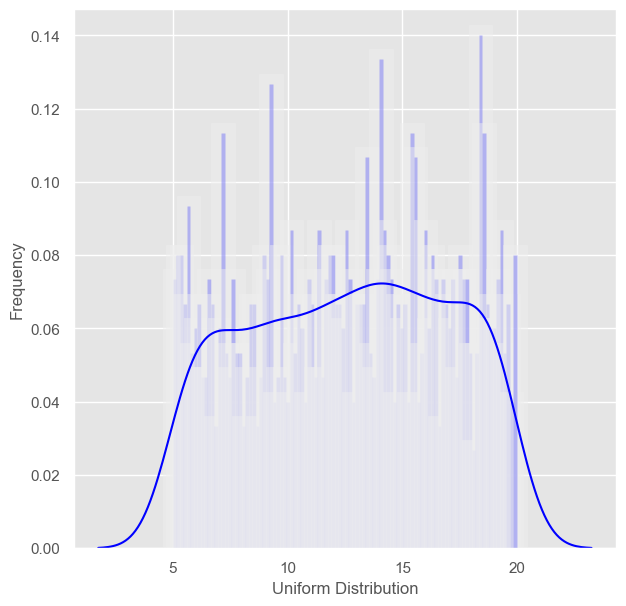

In [48]:
ax = sns.distplot(data_uniform,
                  bins = 100,
                  kde = True,
                  color = 'blue',
                  hist_kws = {"linewidth": 15, 'alpha':0.5}
)
ax.set(xlabel='Uniform Distribution', ylabel = 'Frequency')

##### Distribusi Normal


In [49]:
normal = norm.rvs(size = 200, loc=0, scale=1)
normal

array([ 0.54578379,  1.0952011 ,  2.32848093, -0.09985413, -0.60516011,
       -1.90088654, -0.0287084 , -0.61691999, -0.73323017,  0.87598481,
       -0.70540224,  1.11444835,  1.44001048, -0.58677724, -0.77315817,
       -1.18072083, -1.42964052, -0.05980473,  1.50692649, -0.92076323,
        0.12357914,  0.82496317, -1.62073521, -1.39665775, -2.62598234,
       -0.76049728,  0.54469834, -0.42056338,  0.59910838,  0.01573354,
        0.78194903,  0.06592767,  0.00748061, -0.69205257, -0.658674  ,
        1.33605756, -1.28672768, -0.50067707,  0.69437586,  0.73472199,
        0.13434578,  0.76920693, -0.74740155, -2.13573537,  0.45990978,
        0.56821534, -0.13965931,  1.00716205,  0.90780211, -0.40114925,
       -0.36401876, -2.2930385 , -0.03427221,  1.19921428, -0.3637787 ,
       -0.80652048,  0.50229296,  0.84464069,  0.32514973,  0.34038178,
       -0.96359618,  0.50679351,  0.38747215, -1.66935166,  0.55625755,
        0.95731652,  0.06567029,  0.58731033, -0.58945667,  1.20

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\2669100288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(normal,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

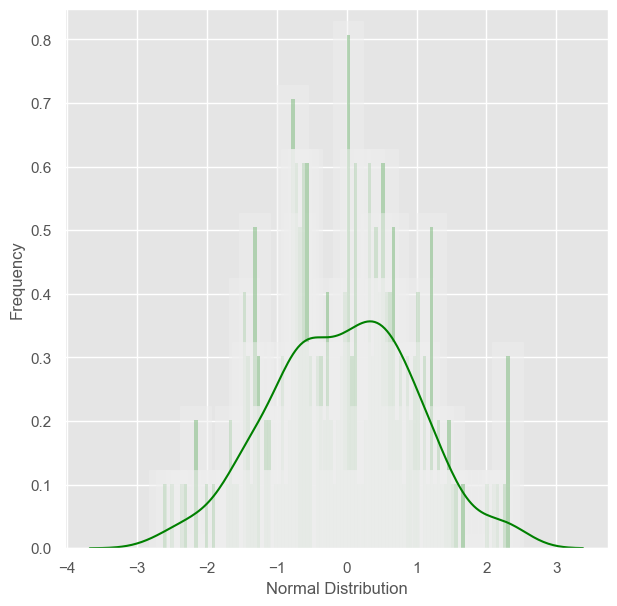

In [50]:
ax = sns.distplot(normal,
                  bins = 100,
                  kde = True,
                  color = 'green',
                  hist_kws = {"linewidth": 20, 'alpha':0.5}
)
ax.set(xlabel='Normal Distribution', ylabel = 'Frequency')

#### Gamma Distribution

In [51]:
data_gamma=gamma.rvs(a=5,size=1000)
data_gamma

array([ 4.19263544,  4.04872422,  1.34907064, 11.77132475,  9.27796123,
        4.65080075,  6.56546549,  4.00166178,  3.36445219,  1.76482975,
        3.53809461,  4.92529326,  4.3541173 ,  9.86045117,  3.46545233,
        4.73290276,  4.29495585,  1.56734174,  6.62637731,  5.47295144,
        4.76265581,  7.99803122,  3.07984548,  8.33473191,  6.80866254,
        3.77788722,  4.34101065,  5.37453753,  8.32683058,  4.31067643,
        3.95615784,  5.46890618,  6.66787953,  6.13690058,  4.52628251,
        1.01391707,  8.42251646,  4.8062687 ,  5.79602443, 10.01058133,
        3.50685706,  4.30735489,  7.66275181, 12.8656554 ,  6.51018194,
        1.17065137,  2.97514979,  7.95069187,  8.15302863,  1.7627818 ,
        5.21476029,  4.04021778,  9.97309175,  5.54805198,  1.96654301,
        1.11175877,  7.15404505,  1.55353471,  3.65681584,  3.82416393,
        4.02762359,  6.76564229,  5.84779818,  5.87952669,  6.29658171,
        2.93961665,  1.57424461,  2.38737077,  3.59865954,  5.50

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\838200891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_gamma,


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

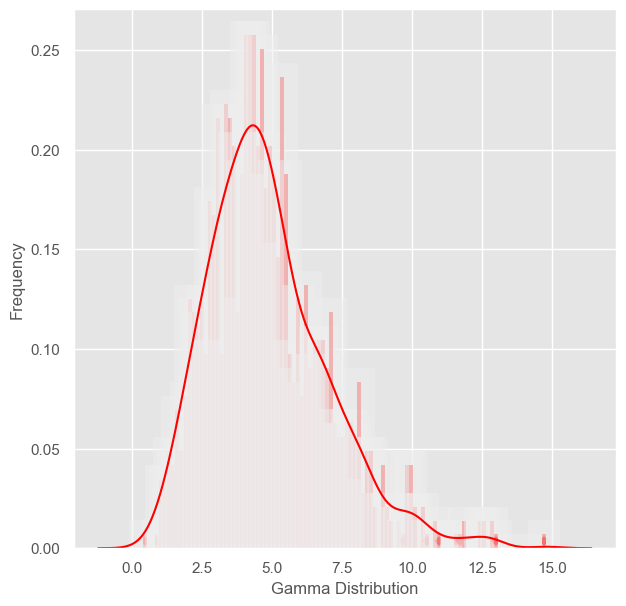

In [52]:
ax = sns.distplot(data_gamma,
                  bins = 100,
                  kde = True,
                  color = 'red',
                  hist_kws = {"linewidth": 20, 'alpha':0.5}
)
ax.set(xlabel='Gamma Distribution', ylabel = 'Frequency')

#### Exponential Distribution

In [53]:
data_expo=expon.rvs(scale=1,loc=0,size=1000)
data_expo

array([2.81810291e-01, 1.04206660e-01, 1.66367814e-01, 2.97830827e-01,
       2.16093865e-03, 5.58824470e-01, 5.74222981e-01, 1.91999048e-02,
       2.43133119e+00, 1.55259521e+00, 1.39074901e+00, 4.89545249e-01,
       2.30784723e+00, 2.45649180e-01, 1.60177178e-01, 2.03434411e+00,
       1.43357363e+00, 2.26667917e+00, 3.98834794e-02, 1.05386446e-02,
       1.20375320e+00, 7.69694386e-01, 1.52864274e+00, 4.11006344e-02,
       5.89167895e-01, 6.67871935e-02, 8.22979774e-01, 3.98703764e-01,
       2.27445182e-02, 5.18547733e-01, 2.49915047e+00, 1.27821039e+00,
       2.98528082e+00, 1.27857062e+00, 1.18714528e+00, 2.48301642e-01,
       6.02262026e-01, 1.32492016e-01, 5.09507114e-01, 1.25839093e-01,
       3.27905087e+00, 1.17238889e+00, 2.01457383e-01, 5.74417445e-01,
       8.16634151e-01, 4.34110895e-01, 3.17548978e+00, 1.18553171e+00,
       8.66988984e-01, 1.89518046e+00, 1.10102246e-01, 4.89013250e-01,
       6.18468583e-01, 8.83801572e-01, 2.28701374e-01, 1.93443330e+00,
      

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\2344079716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_expo,


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

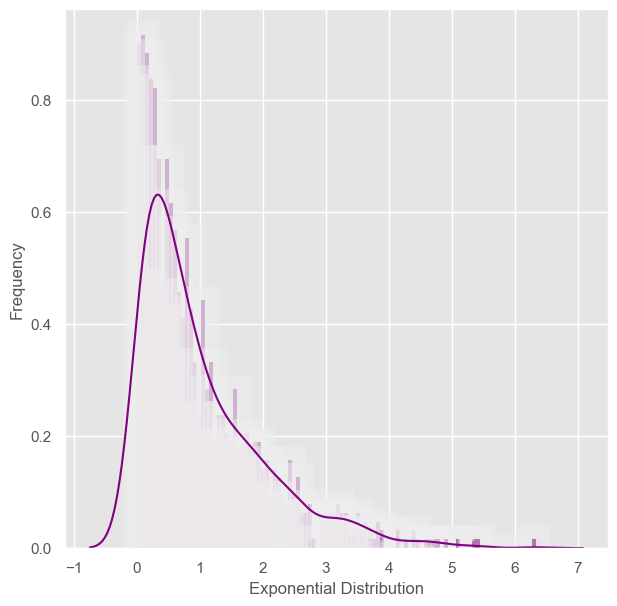

In [54]:
ax = sns.distplot(data_expo,
                  bins = 100,
                  kde = True,
                  color = 'purple',
                  hist_kws = {"linewidth": 20, 'alpha':0.5}
)
ax.set(xlabel='Exponential Distribution', ylabel = 'Frequency')

#### Poison Distribution

In [55]:
data_poisson=poisson.rvs(mu=3,size=1000)
data_poisson

array([ 3,  5,  1,  1,  2,  2,  4,  5,  4,  3,  1,  1,  1,  1,  3,  1,  2,
        4,  2,  4,  1,  2,  6,  3,  2,  2,  3,  2,  1,  7,  2,  3,  5,  5,
        6,  4,  2,  1,  3,  1,  2,  3,  0,  6,  2,  1,  3,  1,  1,  5,  1,
        4,  2,  2,  5,  1,  1,  6,  3,  3,  2,  0,  3,  4,  4,  3,  3,  1,
        2,  5,  1,  2,  2,  1,  1,  4,  2,  2,  3,  2,  3,  4,  5,  1,  6,
        2,  4,  2,  2,  3,  5,  5,  5,  3,  3,  4,  4,  1,  4,  5,  1,  1,
        1,  2,  4,  0,  1,  2,  3,  6,  2,  3,  3,  2,  5,  3,  5,  1,  2,
        7,  8,  6,  3,  5,  4,  1,  2,  0,  6,  3,  5,  5,  3,  2,  3,  2,
        7,  6,  4,  3,  2,  3,  5,  3,  6,  3,  4,  3,  3,  1,  2,  1,  2,
        5,  7,  6,  3,  2,  4,  2,  2,  6,  1,  5,  5,  1,  1,  6,  4,  2,
        2,  4,  5,  6,  0,  1,  4,  3,  2,  4,  6,  3,  3,  5,  2,  0,  3,
        4,  5,  3,  2,  3,  2,  1,  2,  3,  7,  1,  2,  2,  3,  2,  6,  4,
        1,  3,  3,  2,  4,  2,  3,  2,  2,  0,  4,  4,  3,  4,  4,  0,  5,
        0,  2,  2,  4,  6

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\211892266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poisson,


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

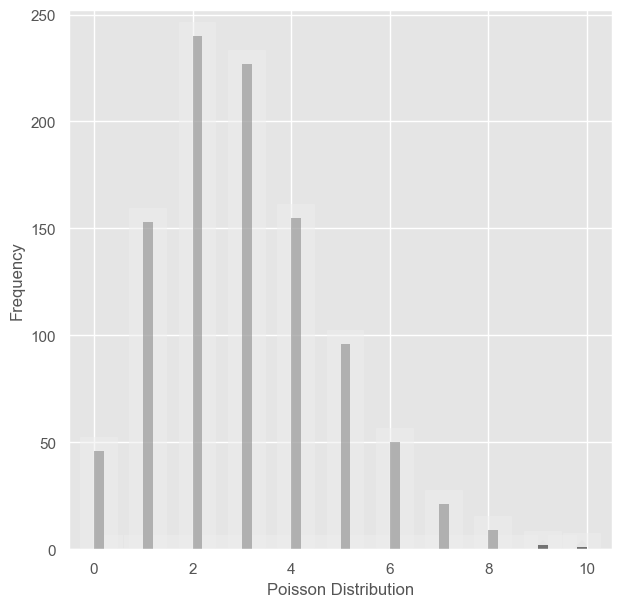

In [56]:
ax = sns.distplot(data_poisson,
                  bins = 50,
                  kde = False,
                  color = 'black',
                  hist_kws = {"linewidth": 20, 'alpha':0.5}
)
ax.set(xlabel='Poisson Distribution', ylabel = 'Frequency')

#### Binomial Distribution

In [57]:
data_binom=binom.rvs(n=10,p=0.8,size=1000)
data_binom

array([ 7,  7,  9,  8,  8,  5,  8,  9,  9,  8,  8,  6,  7,  8,  8,  7,  9,
        8,  9,  9, 10,  6,  8,  6,  9,  9,  6,  8,  7,  6,  6,  7,  7,  9,
        8,  9,  8,  7,  9,  8,  9,  8,  8,  9, 10,  8,  5,  8,  8,  8,  9,
        7,  8,  6,  8,  7,  9,  8,  8, 10,  6,  5,  8,  8,  9,  8,  9,  8,
        8,  6,  8,  8,  6,  8,  8,  9,  8, 10,  8,  9,  7,  8,  9,  9,  9,
        9,  9,  6,  6, 10, 10,  4,  8,  7, 10,  9,  9,  8,  8,  8,  7,  4,
        5,  8,  8,  6,  8,  9,  8,  8,  8,  9,  7,  6,  7,  7,  7,  8,  8,
        6,  9,  8,  7,  8,  9,  9,  9,  8,  9,  9,  9,  9,  8,  8,  8,  9,
        8,  8,  8,  9,  9,  9,  7,  9,  5,  7,  8,  8,  7,  8,  7,  6,  9,
        8,  8,  9,  6,  8,  8,  9,  8,  7,  8, 10,  7,  9,  8,  9,  8,  8,
        8,  8,  7,  7,  8,  7,  9,  8, 10,  8, 10,  6, 10,  7,  9,  9,  7,
        8,  8,  7,  7,  7, 10,  7,  8,  9,  8,  9,  6,  8,  8, 10,  8,  7,
        7,  8,  9, 10,  9,  9,  5,  8,  9,  7, 10,  9,  6,  7,  5,  7,  7,
        5,  6,  8,  9, 10

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\1716176285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_binom,


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

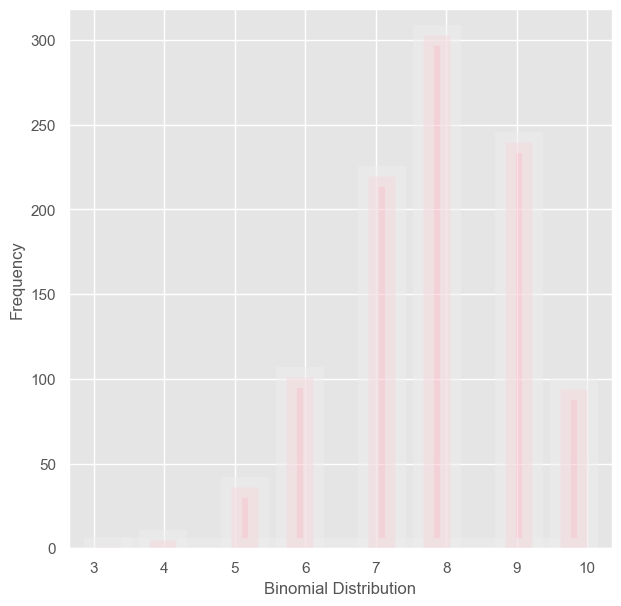

In [58]:
ax = sns.distplot(data_binom,
                  kde = False,
                  color = 'Pink',
                  hist_kws = {"linewidth": 15, 'alpha':0.5}
)
ax.set(xlabel='Binomial Distribution', ylabel = 'Frequency')

#### Bernoulli Distribution

In [59]:
data_bern=bernoulli.rvs(size=1000, p=0.6)
data_bern

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\2653186633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_bern,


[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

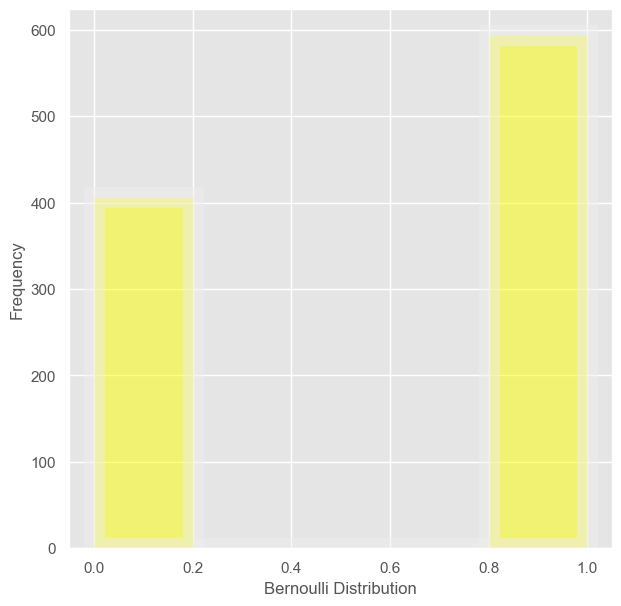

In [60]:
ax = sns.distplot(data_bern,
                  kde = False,
                  color = 'Yellow',
                  hist_kws = {"linewidth": 15, 'alpha':0.5}
)
ax.set(xlabel='Bernoulli Distribution', ylabel = 'Frequency')

### Confident Interval

In [61]:
mean_confiden = chelsea_['BLOCK'].mean()
n_confiden = chelsea_['BLOCK'].count()
sd_confiden = statistics.stdev(chelsea_['BLOCK'])
z = 1.96 
mean_confiden

754.2336328626444

In [62]:
n_confiden

779

In [63]:
sd_confiden

37.418248143276614

In [64]:
lcb = mean_confiden - z * (sd_confiden/np.sqrt(n_confiden))
ucb = mean_confiden + z * (sd_confiden/np.sqrt(n_confiden))
print(lcb,ucb)

751.6059630412153 756.8613026840735


In [65]:
mean_confi = chelsea_['YEAR BUILT'].mean()
n_confi = chelsea_['YEAR BUILT'].count()
sd_confi = statistics.stdev(chelsea_['YEAR BUILT'])
z = 1.96 
mean_confi

1551.6059050064184

In [66]:
n_confi

779

In [67]:
sd_confi

790.8799970174424

In [68]:
lcb = mean_confi - z * (sd_confi/np.sqrt(n_confi))
ucb = mean_confi + z * (sd_confi/np.sqrt(n_confi))
print(lcb,ucb)

1496.0669205895842 1607.1448894232526


### Hypothesis Testing

- if p-value>alpha: fail to reject the null hypothesis (i.e not significant result)
- if p-value<=alpha: reject the null hypothesis (i.e significant result)

In [69]:
stat, p = pearsonr(yearbuilt_, blok)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')


stat=-0.096, p=0.007
Probably Dependent


Karena nilai p-value<=alpha(0.05) maka H0 ditolak yang berarti bahwa tahun pembangunan dan block berpengaruh secara signifikan terhadap variabel dependen